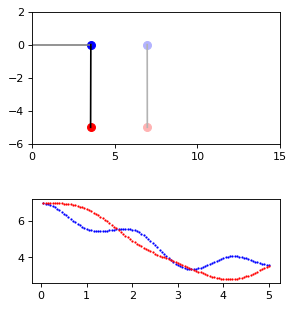

In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from IPython import display

# Function to get acceleration of the mass and the pendulum, based off of Lagrangian Mechanics. The variable 'a' refers to the 
# acceleration of the units away from the equilibrium position of the spring, while the 'alpha' variable refers to the 
# angular acceleration of the angle phi between the vertical and the pendulum's string.

def acc(m, M, k, g, L, x, phi):
    a = (-k*x + M*g*phi)/m;
    alpha = (k*x - g*(m + M)*phi)/(L*m);
    
    return a, alpha;

def main():
    
    # defining necessary variables for the simulation. 
    t = 0;
    tf = 5;
    dt = 0.05;
    N = int(np.ceil(tf/dt));
    plotRealTime = True;
    
    # defining the physical variables.
    x_eq = 5
    x = random.random()*5;
    x_total = x_eq + x;
    xstart = x_total;
    
    phi = random.random()*math.pi/16;
    
    m = random.randint(1,50);
    M = random.randint(1,50);
    k = random.randint(10,100);
    L = 5;
    g = 9.8;
    
    xp_eq = x_total;
    xp = L*math.sin(phi);
    xp_total = xp_eq + xp;
    xpstart = xp_total;
    
    y = -L*math.cos(phi);
    ystart = y;
    
    
    # objects are released at rest. 
    vl = 0;
    omega = 0;
    
    acl = acc(m, M, k, g, L, x, phi);
    a = acl[0];
    alpha = acl[1];
    
    # creating the plots and turning interactive plotting on to animate our results.  
    plt.ion();
    fig = plt.figure(figsize=(4,5), dpi=80);
    grid = plt.GridSpec(3, 1, wspace=0.0, hspace=0.3);
    ax1 = plt.subplot(grid[0:2,0]);
    ax2 = plt.subplot(grid[2,0]);
    
    for i in range(N):
        
        # updating 'x' and 'phi' based on the acceleration function created above and using the leapfrog integration technique. 
        phi += omega*dt + 0.5*alpha*dt**2;
        omega += alpha*dt/2.0;
        
        x += vl*dt + 0.5*a*dt**2;
        vl += a*dt/2.0;
        
        acl = acc(m, M, k, g, L, x, phi);
        a = acl[0];
        alpha = acl[1];
        omega += alpha*dt/2.0;
        vl += a*dt/2.0;
        t += dt;
        
        x_total = x + x_eq;
        
        xp = L*math.sin(phi);
        xp_total = x_total + xp;
        
        y = -L*math.cos(phi);
        
        if plotRealTime or (i == N-1):
            
            # clear graphs for every iteration and plot the positions of cart and pendulum (with the spring and string drawn)
            # the position is plotted as 'y' vs. 'x'.
            plt.sca(ax1);
            plt.cla();
            
            pxstart = [xstart,xpstart];
            pystart = [0, ystart];
            ax1.plot(pxstart, pystart, color = [0.7,0.7,0.7]);
            
            ax1.scatter(xstart,0,s=50,color=[0.7,0.7,1]);
            ax1.scatter(xpstart,ystart,s=50,color=[1,0.7,0.7]);
            ax1.scatter(x_total,0,s=50,color='blue');
            ax1.scatter(xp_total,y,s=50,color='red');
            
            sp1 = [0,x_total];
            px1 = [x_total,xp_total];
            ys = [0,0];
            yp = [0,y]
            
            ax1.plot(sp1, ys, color = 'grey');
            ax1.plot(px1, yp, color = 'black');
            
            ax1.set(xlim=(0, 15), ylim=(-6, 2));
            ax1.set_aspect('equal', 'box');
            ax1.set_xticks([0,5,10,15]);
            ax1.set_yticks([-6,-4,-2,0,2]);
            
            # graph the second plot with the position 'x' with respect to time.
            plt.sca(ax2);
            plt.scatter(t,x_total,color='blue',s=1);
            plt.scatter(t,xp_total,color='red',s=1);
            
            # the part of the code that animates results rather than plotting a graph for each iteration of the 'for' loop.
            display.display(plt.gcf());
            display.clear_output(wait=True);
            fig.canvas.draw();
            fig.canvas.flush_events();
            
    return 0;

if __name__== "__main__":
    main()